In [1]:
from src import *

In [3]:
X = np.linspace(-1,1, 100)

In [112]:
x = np.random.uniform(-1,0, 10000)
y = np.random.uniform(-1,1, 10000)
validindex = np.abs(x) + np.abs(y) < 1

x2 = np.random.uniform(0, 1, 10000)
y2 = np.random.uniform(0,1, 10000)
validindex2 = np.sqrt(x2**2 + y2**2) < 1

In [113]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

Text(0.5, 1.0, 'Procruste Aligned')

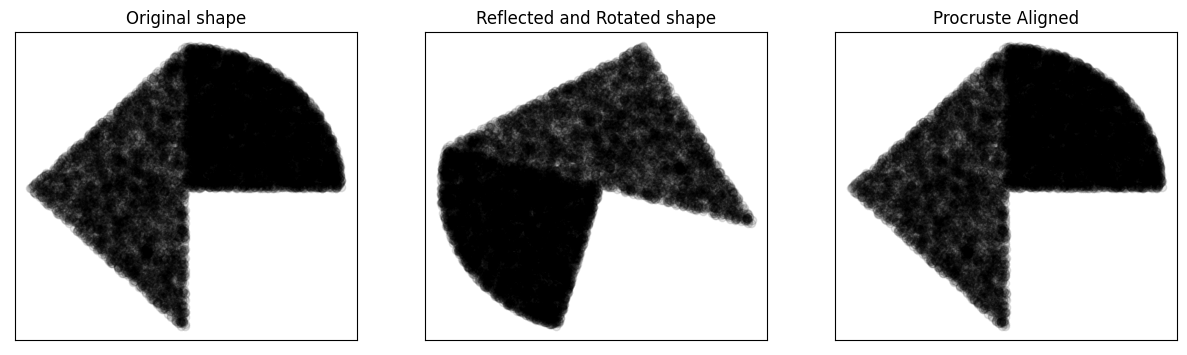

In [132]:
# original
ots1 = np.stack([x[validindex], y[validindex]]).T
ots2 = np.stack([x2[validindex2], y2[validindex2]]).T

# reflection and rotation
pts1 = np.stack([-x[validindex], y[validindex]]).T
pts2 = np.stack([-x2[validindex2], y2[validindex2]]).T
rpts1 = np.asarray([rotate((0,0), pts1[i], 1.3) for i in range(len(pts1))])
rpts2 = np.asarray([rotate((0,0), pts2[i], 1.3) for i in range(len(pts2))])

ref = np.concatenate([ots1, ots2])
target = np.concatenate([rpts1, rpts2])

procrusted = procrustes_align([target], ref=ref)[0][0]

fig, ax = plt.subplots(1,3, figsize=(15,4))

ax[0].scatter(ref[:,0],ref[:,1], color='k', alpha=0.1)
ax[0].set_xticks([])
ax[0].set_yticks([])


ax[1].scatter(target[:,0],target[:,1], color='k', alpha=0.1)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].scatter(procrusted[:,0],procrusted[:,1], color='k', alpha=0.1)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_title('Original shape')
ax[1].set_title('Reflected and Rotated shape')
ax[2].set_title('Procruste Aligned')

In [160]:
x3 = np.random.uniform(-1,1, 10)
y3 = np.random.uniform(-1,1, 10)
validindex3 = np.sqrt(x3**2 + y3**2) < 1
ots3  = np.stack([x3[validindex3], y3[validindex3]]).T
rots3 = np.asarray([rotate((0,0), ots3[i], 3.3) for i in range(len(ots3))])

([], [])

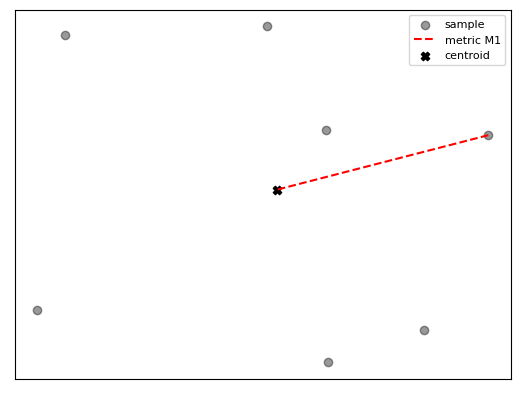

In [201]:
plt.scatter(rots3[:,0],rots3[:,1], color='k', label='sample', alpha=0.4)
plt.plot([rots3[0,0], np.mean(rots3,axis=0)[0]], [rots3[0,1], np.mean(rots3,axis=0)[1]],
         linestyle='--', color='r', label='metric M1')
plt.scatter(np.mean(rots3,axis=0)[0],np.mean(rots3,axis=0)[1], color='k', marker='X', label='centroid')
plt.legend(prop={'size':8})
plt.xticks([])
plt.yticks([])

([], [])

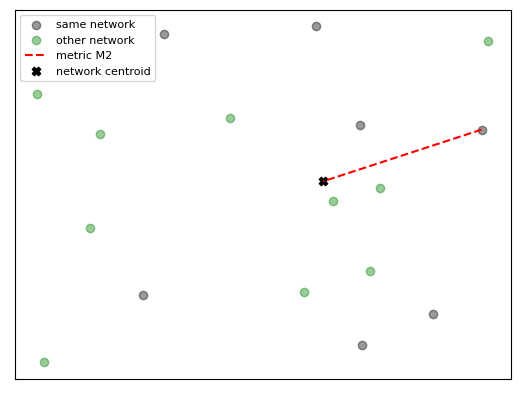

In [195]:
x4 = np.random.uniform(-1,1, 10)
y4 = np.random.uniform(-1,1, 10)
plt.scatter(rots3[:,0],rots3[:,1], color='k', label='same network', alpha=0.4)
plt.scatter(x4,y4, color='g', label='other network', alpha=0.4)
plt.plot([rots3[0,0], np.mean(rots3,axis=0)[0]], [rots3[0,1], np.mean(rots3,axis=0)[1]],
         linestyle='--', color='r', label='metric M2')
plt.scatter(np.mean(rots3,axis=0)[0],np.mean(rots3,axis=0)[1], color='k', marker='X', label='network centroid')
plt.legend(prop={'size':8})
plt.xticks([])
plt.yticks([])

([], [])

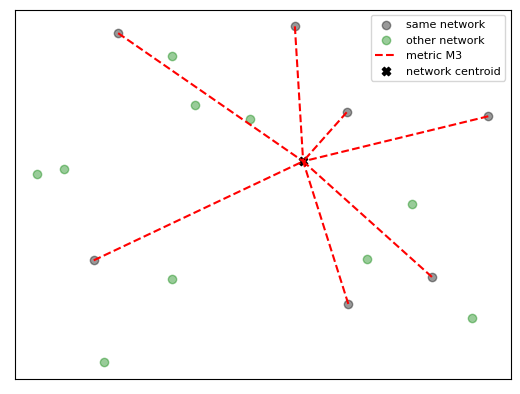

In [194]:
x4 = np.random.uniform(-1,1, 10)
y4 = np.random.uniform(-1,1, 10)
plt.scatter(rots3[:,0],rots3[:,1], color='k', label='same network', alpha=0.4)
plt.scatter(x4,y4, color='g', label='other network', alpha=0.4)
for k in range(len(rots3)):
    if k == 0:
        plt.plot([rots3[k,0], np.mean(rots3,axis=0)[0]], [rots3[k,1], np.mean(rots3,axis=0)[1]],
         linestyle='--', color='r', label='metric M3')
    else:
        plt.plot([rots3[k,0], np.mean(rots3,axis=0)[0]], [rots3[k,1], np.mean(rots3,axis=0)[1]],
         linestyle='--', color='r')
plt.scatter(np.mean(rots3,axis=0)[0],np.mean(rots3,axis=0)[1], color='k', marker='X', label='network centroid')
plt.legend(prop={'size':8})
plt.xticks([])
plt.yticks([])

([], [])

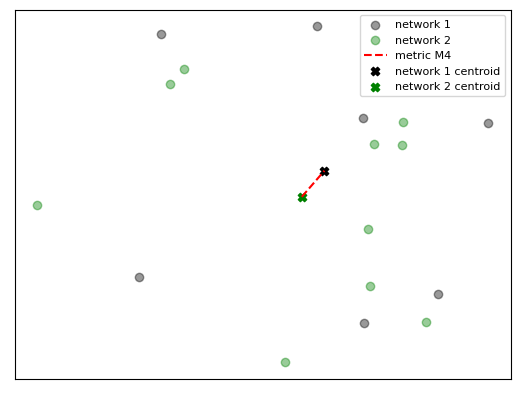

In [200]:
x4 = np.random.uniform(-1,1, 10)
y4 = np.random.uniform(-1,1, 10)
ots4 = np.stack([x4,y4]).T
plt.scatter(rots3[:,0],rots3[:,1], color='k', label='network 1', alpha=0.4)
plt.scatter(ots4[:,0],ots4[:,1], color='g', label='network 2', alpha=0.4)

plt.plot([np.mean(ots4,axis=0)[0], np.mean(rots3,axis=0)[0]], [np.mean(ots4,axis=0)[1], np.mean(rots3,axis=0)[1]],
         linestyle='--', color='r', label='metric M4')

plt.scatter(np.mean(rots3,axis=0)[0],np.mean(rots3,axis=0)[1], color='k', marker='X', label='network 1 centroid')
plt.scatter(np.mean(ots4,axis=0)[0],np.mean(ots4,axis=0)[1], color='g', marker='X', label='network 2 centroid')
plt.legend(prop={'size':8})
plt.xticks([])
plt.yticks([])

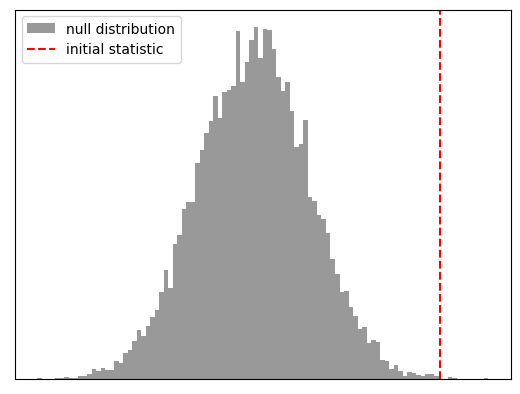

In [216]:
plt.hist(np.random.normal(-1,1,10000), bins=100, color='k', alpha=0.4, label='null distribution')

plt.axvline(x = 2.3, color = 'r', linestyle='--',label = 'initial statistic')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

In [219]:
embedding  = "dm" # diffusion map
aff_kernel = "pearson" #affinity matrix kernel
align_meth = "procrustes"
n_iter     = 10 # procrustes align number of iteration
nb_comp    = 3
rs         = 99

In [224]:
# We look at the same movie data but simply include subcortical in one of the sets
mri_path400 = "./data/fmri400_compiled/"

print(os.listdir(mri_path400))

['TheSecretNumber_compiled.csv', 'ToClaireFromSonny_compiled.csv', 'Chatter_compiled.csv', 'LessonLearned_compiled.csv', 'Payload_compiled.csv', 'AfterTheRain_compiled.csv', 'Superhero_compiled.csv', 'Sintel_compiled.csv', 'TearsOfSteel_compiled.csv', 'BetweenViewing_compiled.csv', 'BigBuckBunny_compiled.csv', 'Rest_compiled.csv', 'YouAgain_compiled.csv', 'Spaceman_compiled.csv', 'FirstBite_compiled.csv']


In [225]:
mri_df400rest   = pd.read_csv(mri_path400 + "Rest_compiled.csv")

In [226]:
filename_rest400  = mri_df400rest.filename.iloc[1000000]
rest_series400,  _ = df_to_timeseries(mri_df400rest, filename_rest400)
fc_rest400  = FC(rest_series400)

In [275]:
g_rest400  = GradientMaps(n_components=nb_comp, approach=embedding, kernel=aff_kernel, random_state=rs)
g_rest400.fit(fc_rest400)

g_rest2  = GradientMaps(n_components=nb_comp, approach=embedding, kernel=aff_kernel, random_state=rs)
g_rest2.fit(fc_rest400+1)

GradientMaps(kernel='pearson', n_components=3, random_state=99)

In [276]:
g_tmp  = GradientMaps(n_components=nb_comp, approach=embedding, kernel=aff_kernel, random_state=rs)
g_tmp.fit(tmp)

GradientMaps(kernel='pearson', n_components=3, random_state=99)

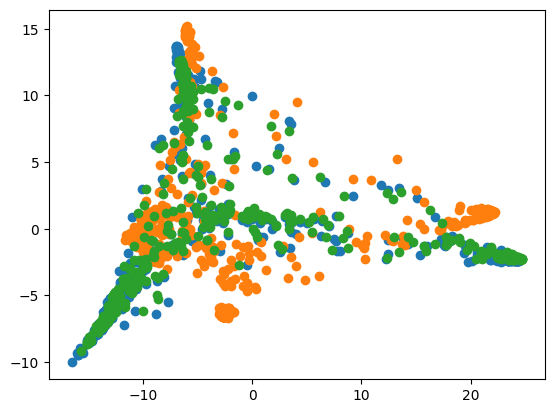

In [277]:
plt.scatter(g_rest400.gradients_[:,0],g_rest400.gradients_[:,1])
plt.scatter(g_tmp.gradients_[:,0],g_tmp.gradients_[:,1])
plt.scatter(g_rest2.gradients_[:,0],g_rest2.gradients_[:,1])

In [273]:
tmp = deepcopy(fc_rest400)

In [274]:
tmp[200:280,300:380] = 1